In [ ]:
!touch n1.txt

In [ ]:
with open('/content/n1.txt') as f:
  data=f.read()

In [ ]:
data

'The Adventure of the Three Gables\n\n  I don\'t think that any of my adventures with Mr. Sherlock\nHolmes opened quite so abruptly, or so dramatically, as that\nwhich I associate with The Three Gables. I had not seen Holmes\nfor some days and had no idea of the new channel into which his\nactivities had been directed. He was in a chatty mood that\nmorning, however, and had just settled me into the well-worn\nlow armchair on one side of the fire, while he had curled down\nwith his pipe in his mouth upon the opposite chair, when our\nvisitor arrived. If I had said that a mad bull had arrived it would\ngive a clearer impression of what occurred.\n  The door had flown open and a huge negro had burst into the\nroom. He would have been a comic figure if he had not been\nterrific, for he was dressed in a very loud gray check suit with a\nflowing salmon-coloured tie. His broad face and flattened nose\nwere thrust forward, as his sullen dark eyes, with a smouldering\ngleam of malice in them, t

In [ ]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data=data.lower()
data=re.sub(r'[\n]', ' ',data)
data=re.sub(r'[\']','',data)
data=re.sub(r'["?!]', ' ',data)
data=re.sub(r'[.,]', ' ',data)
data=re.sub(r'[:;]', ' ',data)
data=re.sub(r'[0]', ' ',data)
data=re.sub(r'[1]', ' ',data)
data=re.sub(r'[\[\]]', ' ',data)
data=re.sub(r'[\-]', ' ',data)

In [ ]:
data

'the adventure of the three gables    i dont think that any of my adventures with mr  sherlock holmes opened quite so abruptly  or so dramatically  as that which i associate with the three gables  i had not seen holmes for some days and had no idea of the new channel into which his activities had been directed  he was in a chatty mood that morning  however  and had just settled me into the well worn low armchair on one side of the fire  while he had curled down with his pipe in his mouth upon the opposite chair  when our visitor arrived  if i had said that a mad bull had arrived it would give a clearer impression of what occurred    the door had flown open and a huge negro had burst into the room  he would have been a comic figure if he had not been terrific  for he was dressed in a very loud gray check suit with a flowing salmon coloured tie  his broad face and flattened nose were thrust forward  as his sullen dark eyes  with a smouldering gleam of malice in them  turned from one of u

In [ ]:
(set(data))

{' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
words = nltk.word_tokenize(data)

In [ ]:
len(words)

6115

In [ ]:
def initialization(N,V):
  W1=np.random.randn(N,V)
  W2=np.random.randn(V,N)
  b1=np.random.randn(N,1)
  b2=np.random.randn(V,1)
  return W1,W2,b1,b2

In [ ]:
def relu(x):
  return np.maximum(0,x)

In [ ]:
def softmax(x):
  return tf.nn.softmax(x,axis=0)

In [ ]:
def forward_pass(x,W1,W2,b1,b2):
  z1=np.dot(W1,x)+b1
  z1=relu(z1)
  z2=np.dot(W2,z1)+b2
  y_pred=softmax(z2)
  return z1,y_pred

In [ ]:
def cost_compute(y,y_pred):
  cost=np.multiply(np.log(y_pred),y)+np.multiply(np.log(1-y_pred),(1-y))
  return np.squeeze((-1/np.shape(y)[1])*np.sum(cost))

In [ ]:
def backprop(x,W1,W2,b1,b2,z1,y_pred,y):
  dw1=np.dot(relu(np.dot(W2.T, y_pred - y)), x.T)
  dw2=np.dot((y_pred-y),z1.T)
  db1=relu(np.dot(W2.T,(y_pred-y)))
  db2=y_pred-y
  return dw1,dw2,db1,db2

In [ ]:
def model(x,y,epoches=10,alpha=0.01):
  W1,W2,b1,b2=initialization(300,len(setn))
  e=[]
  for i in tqdm(range(epoches)):
    z1,y_pred=forward_pass(x,W1,W2,b1,b2)
    error=cost_compute(y,y_pred)
    e.append(error)
    dW1,dW2,db1,db2=backprop(x,W1,W2,b1,b2,z1,y_pred,y)
    W1=W1-alpha*dW1
    W2=W2-alpha*dW2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
  return y_pred,e,W1,W2

In [ ]:
setn=set(words)
print(setn)

{'four', 'know', 'well', 'she', 'knotted', 'explained', 'idea', 'save', 'auctioneer', 'sulky', 'work', 'constables', 'power', 'banged', 'chanced', 'several', 'mouth', 'name', 'person', 'looked', 'inspector', 'extraordinary', 'world', 'not', 'folks', 'upper', 'gate', 'missed', 'him', 'my', 'woke', 'off', 'icy', 'club', 'can', 'savage', 'weald', 'trunks', 'tall', 'friend', 'cautionary', 'cowed', 'three', 'agony', 'hiring', 'possessions', 'sentence', 'scent', 'returned', 'growled', 'observed', 'grown', 'no', 'make', 'humilia', 'given', 'madam', 'therefore', 'order', 'imperative', 'us', 'behind', 'reference', 'celerity', 'wait', 'data', 'fancy', 'dr', 'approach', 'shoulder', 'together', 'covet', 'spoke', 'occasional', 'merely', 'obscure', 'afraid', 'sheet', 'buried', 'might', 'helped', 'steve', 'ruin', 'line', 'which', 'justice', 'fate', 'tering', 'quicker', 'italy', 'himself', 'postmark', 'clients', 'brooding', 'while', 'anything', 'game', 'gloom', 'imagine', 'youve', 'wolf', 'first', 'ca

In [ ]:
idx2w={}
w2idx={}
for i,w in enumerate(setn):
  idx2w[i]=w
  w2idx[w]=i
print(idx2w)
print(w2idx)

def get_windows(words, C):
    i = C
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i - C):i] + words[(i+1):(i+C+1)]
        yield context_words, center_word
        i += 1

def one_hot(center_word,w2idx):
  one_hot=np.zeros((len(w2idx),1))
  one_hot[w2idx[center_word]]=1
  return one_hot

def context_one_hot_mean(context_words,w2idx):
  one_hott=[one_hot(word,w2idx) for word in context_words]
  one_hott=np.mean(one_hott,axis=0)
  return one_hott

def get_training_example(words, C, word2Ind):
  X_train, y_train = [], []
  for context_words, center_word in get_windows(words, C):
    X_train.append(context_one_hot_mean(context_words, w2idx))
    y_train.append(one_hot(center_word, w2idx))
  return X_train, y_train

X_train, y_train = get_training_example(words, 3, w2idx)

X_train = (np.array(X_train))
y_train = (np.array(y_train))

{0: 'four', 1: 'know', 2: 'well', 3: 'she', 4: 'knotted', 5: 'explained', 6: 'idea', 7: 'save', 8: 'auctioneer', 9: 'sulky', 10: 'work', 11: 'constables', 12: 'power', 13: 'banged', 14: 'chanced', 15: 'several', 16: 'mouth', 17: 'name', 18: 'person', 19: 'looked', 20: 'inspector', 21: 'extraordinary', 22: 'world', 23: 'not', 24: 'folks', 25: 'upper', 26: 'gate', 27: 'missed', 28: 'him', 29: 'my', 30: 'woke', 31: 'off', 32: 'icy', 33: 'club', 34: 'can', 35: 'savage', 36: 'weald', 37: 'trunks', 38: 'tall', 39: 'friend', 40: 'cautionary', 41: 'cowed', 42: 'three', 43: 'agony', 44: 'hiring', 45: 'possessions', 46: 'sentence', 47: 'scent', 48: 'returned', 49: 'growled', 50: 'observed', 51: 'grown', 52: 'no', 53: 'make', 54: 'humilia', 55: 'given', 56: 'madam', 57: 'therefore', 58: 'order', 59: 'imperative', 60: 'us', 61: 'behind', 62: 'reference', 63: 'celerity', 64: 'wait', 65: 'data', 66: 'fancy', 67: 'dr', 68: 'approach', 69: 'shoulder', 70: 'together', 71: 'covet', 72: 'spoke', 73: 'occ

In [ ]:
X_train = X_train.reshape(1438, 6109)
X_train = X_train.T
X_train.shape

(6109, 1438)

In [ ]:
y_train = y_train.reshape(1438, 6109)
y_train = y_train.T
y_train.shape

(6109, 1438)

In [ ]:
y_pred, error, W1, W2 = model(X_train.T, y_train.T, epoches=100, alpha=0.001)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
embeddings = (W1.T + W2)/2
embeddings.shape

(1438, 300)

(1438, 2)


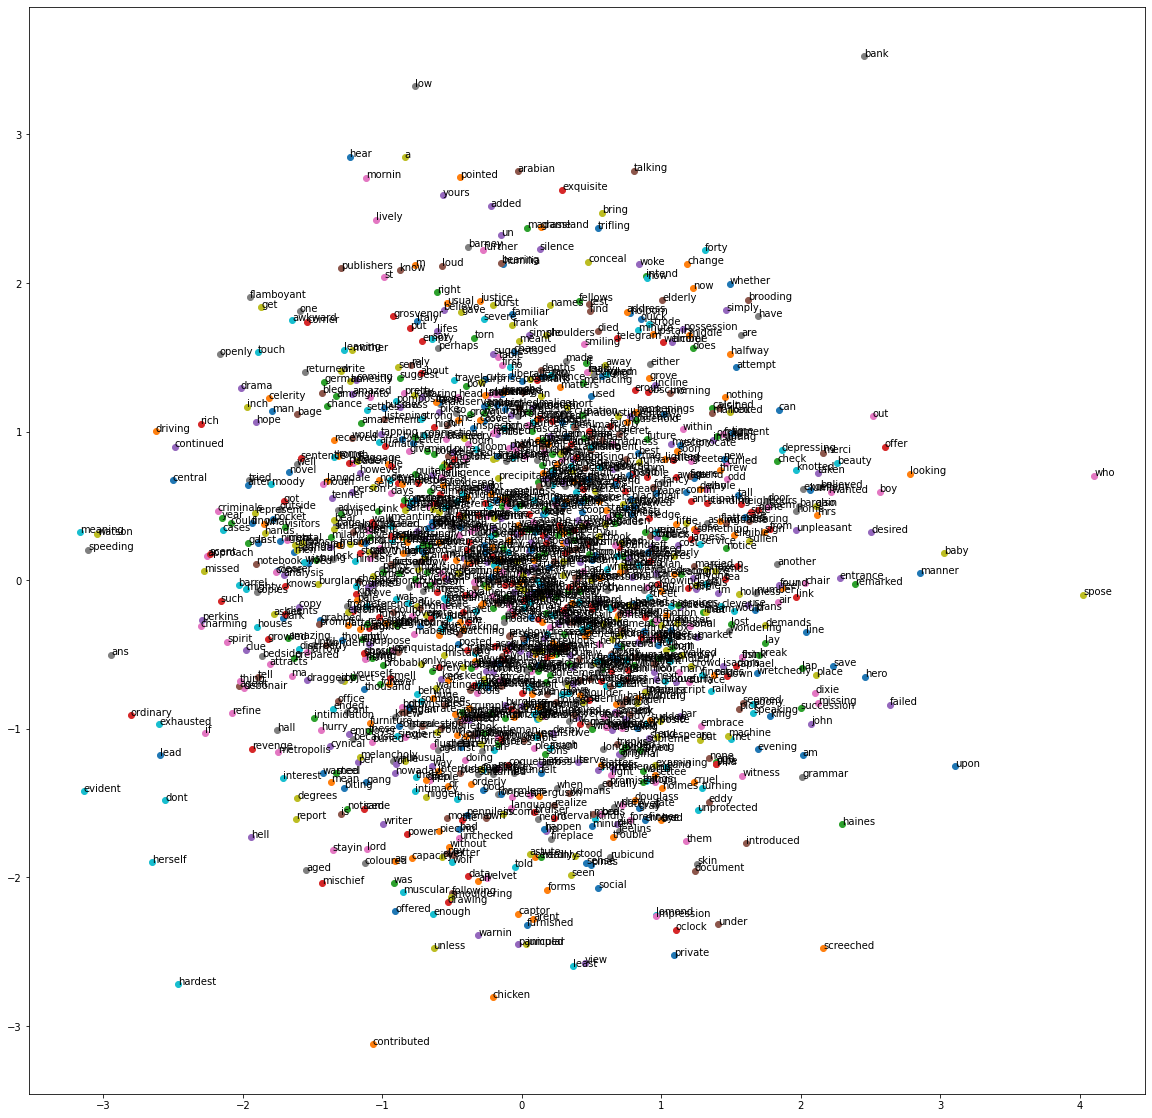

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(embeddings)
print(np.shape(principalComponents))

principalComponents=principalComponents.T

word_to_vector = {}
for word in w2idx.keys():
  word_to_vector[word] = principalComponents[:, w2idx[word]]


plt.figure(figsize = (20, 20))
for word, vector in word_to_vector.items():
  plt.scatter(vector[0], vector[1])
  plt.annotate(word, (vector[0], vector[1]))
plt.show()

SEQUENTIAL API

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
seq_model = keras.Sequential([
                          layers.Dense(units = 300,activation = keras.activations.relu, name='layer1'),
                          layers.Dense(units = 1438, activation = keras.activations.softmax, name = 'layer2')
])
seq_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])


In [ ]:
seq_model.fit(X_train, y_train, epochs=100, verbose=1)

In [ ]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 300)               431700    
_________________________________________________________________
layer2 (Dense)               (None, 1438)              432838    
Total params: 864,538
Trainable params: 864,538
Non-trainable params: 0
_________________________________________________________________


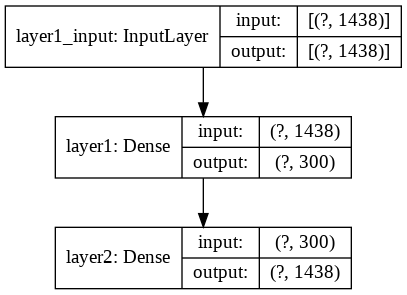

In [ ]:
keras.utils.plot_model(seq_model, show_shapes=True)

In [ ]:
x1=np.array(seq_model.weights[0])
x2=np.array(seq_model.weights[1])

In [ ]:
embeddings=(x1.T+x2)/2
print(np.array(embeddings).shape)

(1438, 300)


(1438, 2)


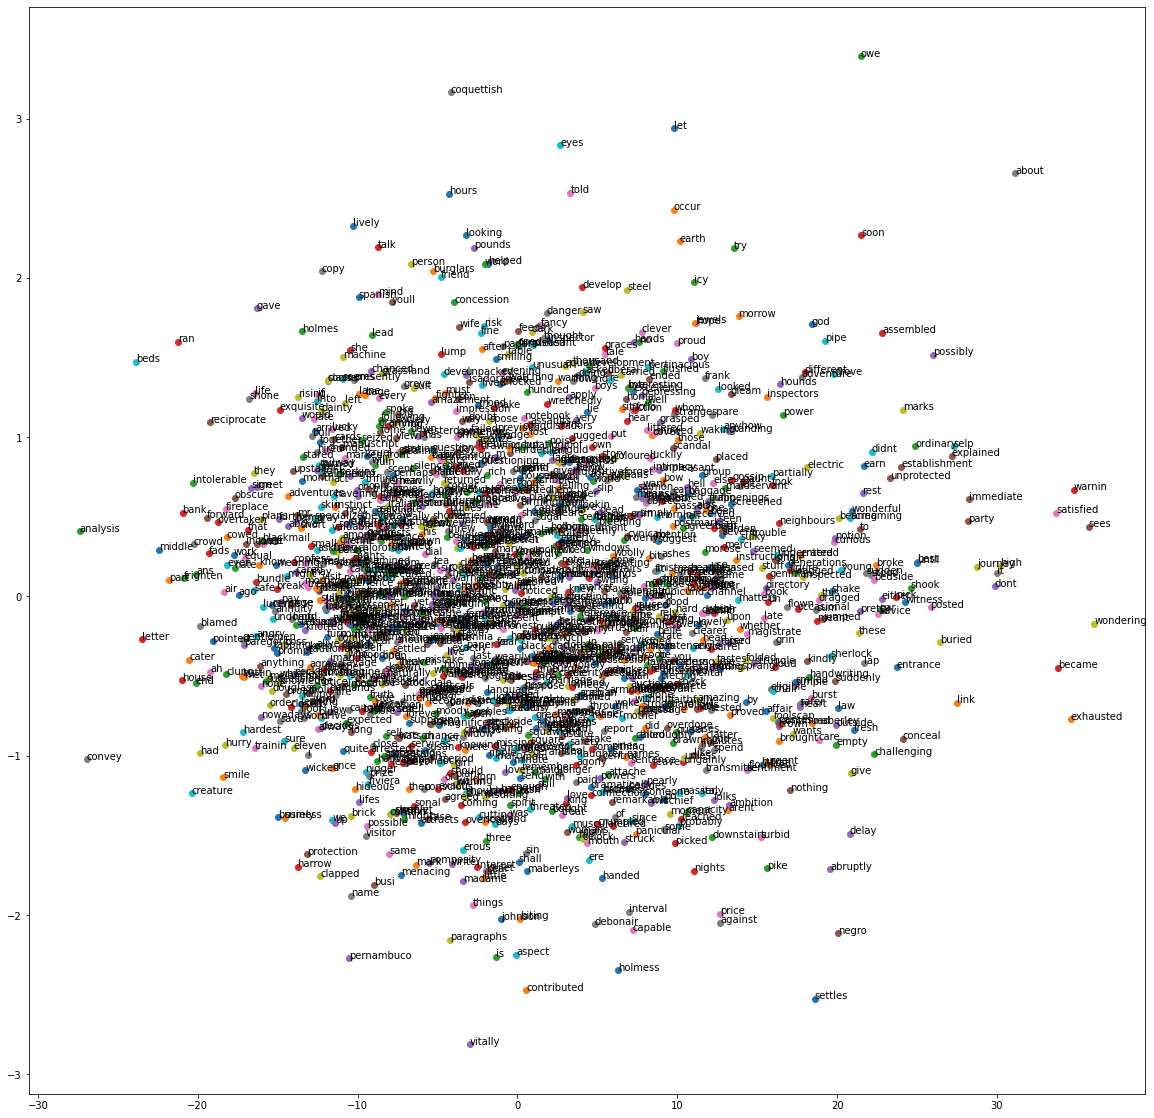

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(embeddings)
print(np.shape(principalComponents))

principalComponents=principalComponents.T

word_to_vector = {}
for word in w2idx.keys():
  word_to_vector[word] = principalComponents[:, w2idx[word]]


plt.figure(figsize = (20, 20))
for word, vector in word_to_vector.items():
  plt.scatter(vector[0], vector[1])
  plt.annotate(word, (vector[0], vector[1]))
plt.show()

FUNCTIONAL API

In [ ]:
inputs = keras.Input(shape=(1438))
layer1 = layers.Dense(300, activation=keras.activations.relu)(inputs)
outputs = layers.Dense(1438, activation=keras.activations.softmax)(layer1)
func_model = keras.Model(inputs=inputs, outputs=outputs)
func_model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1438)]            0         
_________________________________________________________________
dense_7 (Dense)              (None, 300)               431700    
_________________________________________________________________
dense_8 (Dense)              (None, 1438)              432838    
Total params: 864,538
Trainable params: 864,538
Non-trainable params: 0
_________________________________________________________________


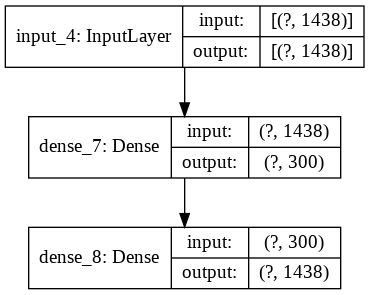

In [ ]:
keras.utils.plot_model(func_model, show_shapes=True)

In [ ]:
func_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
func_model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
191/191 [==============================] - 1s 3ms/step - loss: 7.2804 - accuracy: 3.2739e-04
Epoch 2/100
191/191 [==============================] - 1s 3ms/step - loss: 7.2423 - accuracy: 0.0080
Epoch 3/100
191/191 [==============================] - 1s 3ms/step - loss: 7.1149 - accuracy: 0.0288
Epoch 4/100
191/191 [==============================] - 1s 3ms/step - loss: 6.8949 - accuracy: 0.0643
Epoch 5/100
191/191 [==============================] - 1s 3ms/step - loss: 6.5992 - accuracy: 0.1355
Epoch 6/100
191/191 [==============================] - 1s 3ms/step - loss: 6.2196 - accuracy: 0.1940
Epoch 7/100
191/191 [==============================] - 1s 3ms/step - loss: 5.7552 - accuracy: 0.2285
Epoch 8/100
191/191 [==============================] - 1s 3ms/step - loss: 5.2181 - accuracy: 0.2621
Epoch 9/100
191/191 [==============================] - 1s 3ms/step - loss: 4.6603 - accuracy: 0.2732
Epoch 10/100
191/191 [==============================] - 1s 3ms/step - loss: 4.1079 - ac

In [ ]:
x1=np.array(func_model.weights[0])
x2=np.array(func_model.weights[1])

In [ ]:
embeddings=(x1.T+x2)/2
print(np.array(embeddings).shape)

(1438, 300)


(1438, 2)


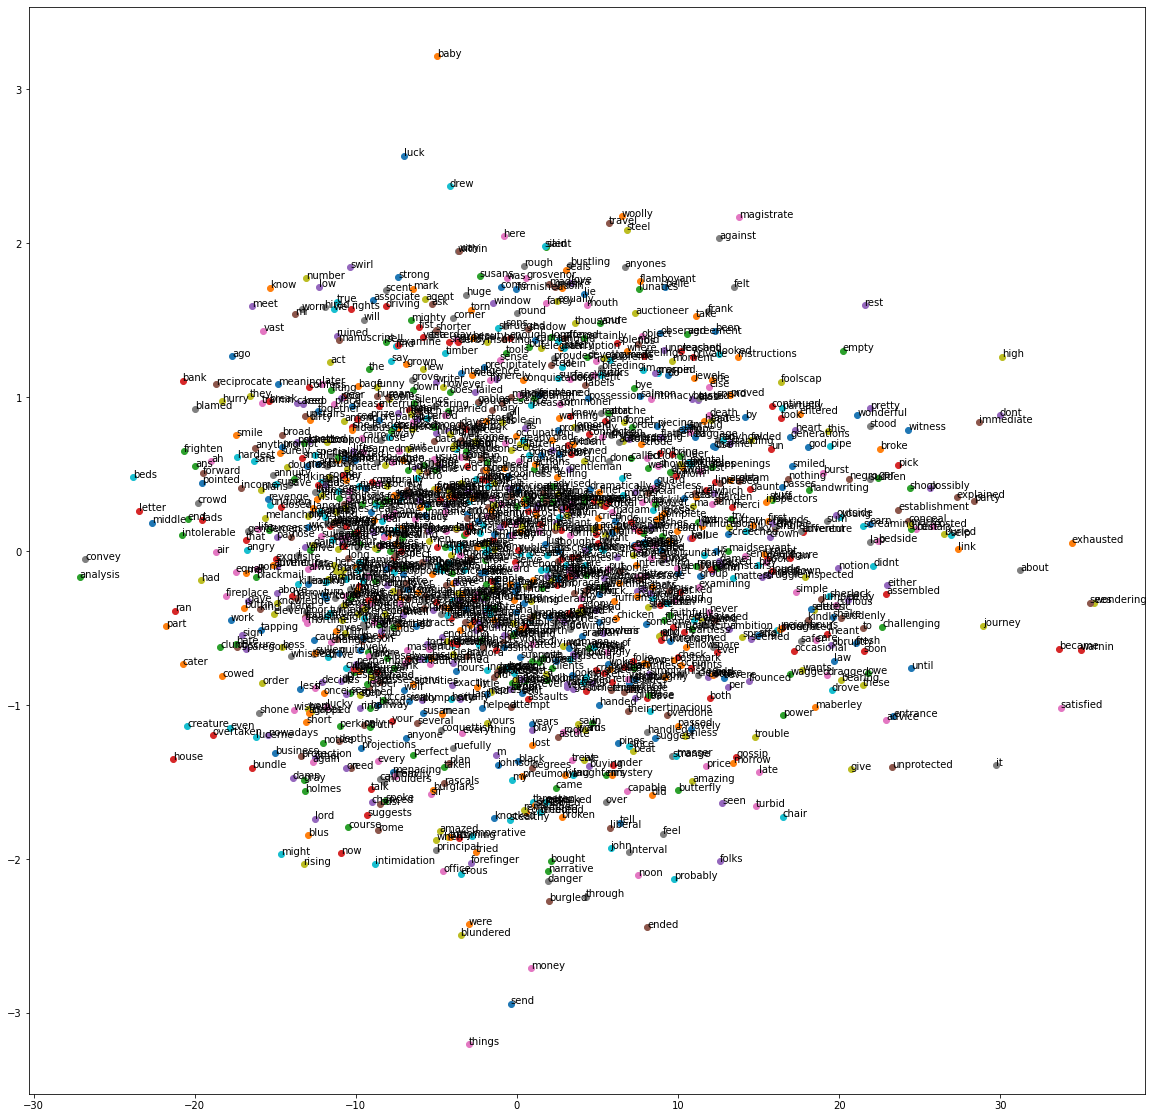

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(embeddings)
print(np.shape(principalComponents))

principalComponents=principalComponents.T

word_to_vector = {}
for word in w2idx.keys():
  word_to_vector[word] = principalComponents[:, w2idx[word]]


plt.figure(figsize = (20, 20))
for word, vector in word_to_vector.items():
  plt.scatter(vector[0], vector[1])
  plt.annotate(word, (vector[0], vector[1]))
plt.show()

SUB-CLASSING API

In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, units, input_dim):
        super(Linear, self).__init__()
        self.w = self.add_weight(
            shape=(input_dim, units), initializer="random_normal", trainable=True
        )
        self.b = self.add_weight(shape=(units,), initializer="random_normal", trainable=True)

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
